<a href="https://colab.research.google.com/github/spshreya/Covid-Detector/blob/main/COVID_19_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0

--2020-11-30 15:23:58--  https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vynypakezgqkchf/CovidDataset.rar [following]
--2020-11-30 15:23:58--  https://www.dropbox.com/s/raw/vynypakezgqkchf/CovidDataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a6c9f38ad1adb0f9af7d31de0.dl.dropboxusercontent.com/cd/0/inline/BEKjWIsHyvmlN5s1vS1gbwTZIGZlYV9UukmfdL7-eiVxtLzvU47c5RaJH7SLI2WDgensqNgglaTQ5PEevqqYRAErmn_QD1tOxc1_fpc0G0FYZ940B2BNSRpWvVn1skx7mjo/file# [following]
--2020-11-30 15:23:59--  https://uc5a6c9f38ad1adb0f9af7d31de0.dl.dropboxusercontent.com/cd/0/inline/BEKjWIsHyvmlN5s1vS1gbwTZIGZlYV9UukmfdL7-eiVxtLzvU47c5RaJH7SLI2WDgensqNgglaTQ5PEevqqYRAErmn_QD1tOx

In [ ]:
!pip install unrar

In [ ]:
!unrar x CovidDataset.rar\?dl\=0


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from CovidDataset.rar?dl=0

Creating    CovidDataset                                              OK
Creating    CovidDataset/Train                                        OK
Creating    CovidDataset/Train/Covid                                  OK
Extracting  CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       0%  OK 
Extracting  CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg       0%  OK 
Extracting  CovidDataset/Train/Covid/0a7faa2a.jpg                          0%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg       0%  1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg       1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg       1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300682-main.p

192
Accuracy: 0.9479166666666666
Prediction is Normal


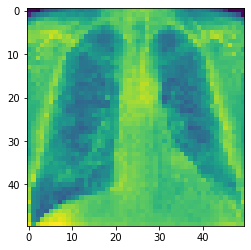

In [ ]:
%matplotlib inline
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#from google.colab.patches import cv2_imshow 
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


dir = 'CovidDataset/Train/'

categories = ['Covid','Normal']

data = []

categories = ['Covid','Normal']

data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        cov_img = cv2.imread(imgpath,0)
        cov_img = cv2.resize(cov_img,(50,50))
        image = np.array(cov_img).flatten()
        data.append([image,label])
        

print(len(data))


pick_in = open('dataP.pickle', 'wb')
pickle.dump(data,pick_in)
pick_in.close

pick_in = open ('dataP.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

from sklearn.svm import SVC
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)
    
#features=features.reshape(features.shape[1:],img_cov)
#features=features.transpose()

xtrain, xtest, ytrain, ytest= train_test_split(features,labels,test_size=0.5)

model = SVC(C=1,kernel = 'poly', gamma = 'auto')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['Covid', 'Normal']

print("Accuracy:", accuracy)
print("Prediction is", categories[prediction[10]])

CovidDataset = xtest[0].reshape(50,50)
plt.imshow(CovidDataset)
plt.show()